In [1]:
import qutip as qu
import numpy as np
import matplotlib.pyplot as plt

In [8]:
omega = 0.4
J = 0.2
final_t = 10
H0 = 2 * np.pi * omega * qu.sigmax()
psi0 = qu.basis(2, 0)
times = np.linspace(0.0, final_t, 3000)
Z0 = qu.ket2dm(qu.basis(2, 0))
result = qu.mesolve(H0, psi0, times, [J * qu.sigmax()], [Z0])
# return np.array(result.expect[0][-1]) 

In [69]:
def commutator(a, b):
    return a*b - b*a

def anticommutator(a, b):
    return a*b + b*a    

In [203]:
rho0 = qu.ket2dm(qu.basis(2, 0))

In [204]:
print(rho0)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 0.]]


In [29]:
print(commutator(rho0, H0))

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[ 0.          2.51327412]
 [-2.51327412  0.        ]]


In [20]:
print(qu.sigmax())
print(H0)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 1.]
 [1. 0.]]
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.         2.51327412]
 [2.51327412 0.        ]]


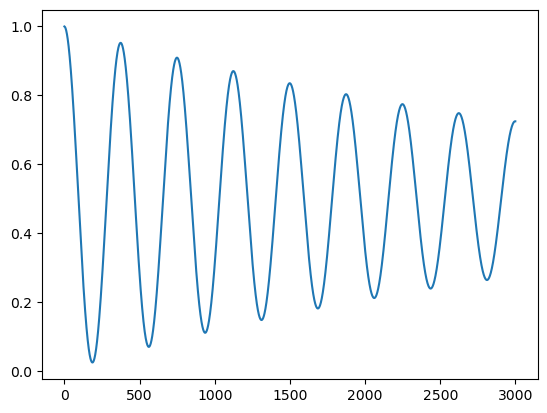

In [9]:
plt.plot(result.expect[0])

In [35]:
def aux(*args):
    print(args)

In [36]:
aux(1, 2 , 3)

(1, 2, 3)


In [93]:
H0 = qu.sigmaz()
print(H0)
print(rho0)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]]
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 0.]]


In [102]:
def lindbladian(H, rho, decay_rates, jump_operators):
    suma = 0
    for decay_i, jump_i in zip(decay_rates,jump_operators):
        print(decay_i)
        print(jump_i)
        suma = suma + decay_i*(jump_i*rho*jump_i.dag() - 0.5*anticommutator(jump_i*jump_i.dag(), rho))
    sol = -1j*commutator(H, rho) + suma
    return sol.full()

In [110]:
a = lindbladian(H0, rho0, [0.1], [qu.sigmax()])
print(a)

0.1
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 1.]
 [1. 0.]]
[[-0.1+0.j  0. +0.j]
 [ 0. +0.j  0.1+0.j]]


In [100]:
print(qu.sigmax())
print(qu.sigmax().dag())

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 1.]
 [1. 0.]]
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 1.]
 [1. 0.]]


In [62]:
qu.sigmax().dag()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 1.]
 [1. 0.]]

In [74]:
from scipy.linalg import expm

In [106]:
expm(a*3)@rho0.full()

array([[0.74081822+0.j, 0.        +0.j],
       [0.        +0.j, 0.        +0.j]])

In [109]:
print(qu.sigmax()*rho0)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[0. 0.]
 [1. 0.]]


AttributeError: 'Qobj' object has no attribute 'to_super'

In [113]:
qu.to_super(rho0).full()

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]])

In [139]:
#everything pls in qobj first

def evol(rho0, H0, operators, t, no_qubits=1):
    liouvillian = qu.liouvillian(H0, c_ops=operators)
    rho_sup = qu.to_super(rho0)
    rho_evol = expm(aux.full()*t)@rho_sup.full()
    dm_evol = rho_evol[:, 0].reshape(-1, 2**no_qubits)
    dm_evol = qu.Qobj(dm_evol)
    return dm_evol
    



In [141]:
print(evol(rho0, H0, [0.1*qu.sigmax()], 3, 1))

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.97088227 0.        ]
 [0.         0.02911773]]


In [119]:
aux = qu.liouvillian(H0, c_ops=[0.1*qu.sigmax()])
rho_sup = qu.to_super(rho0)

In [117]:
print(aux)

Quantum object: dims = [[[2], [2]], [[2], [2]]], shape = (4, 4), type = super, isherm = False
Qobj data =
[[-0.01+0.j  0.  +0.j  0.  +0.j  0.01+0.j]
 [ 0.  +0.j -0.01+2.j  0.01+0.j  0.  +0.j]
 [ 0.  +0.j  0.01+0.j -0.01-2.j  0.  +0.j]
 [ 0.01+0.j  0.  +0.j  0.  +0.j -0.01+0.j]]


In [123]:
result = expm(aux.full()*3)@rho_sup.full()

In [122]:
# result[]

Quantum object: dims = [[[2], [2]], [[2], [2]]], shape = (4, 4), type = super, isherm = False
Qobj data =
[[-0.01+0.j  0.  +0.j  0.  +0.j  0.01+0.j]
 [ 0.  +0.j -0.01+2.j  0.01+0.j  0.  +0.j]
 [ 0.  +0.j  0.01+0.j -0.01-2.j  0.  +0.j]
 [ 0.01+0.j  0.  +0.j  0.  +0.j -0.01+0.j]]

In [124]:
no_qubit = 1

In [127]:
# rho0.

<2x2 sparse matrix of type '<class 'numpy.complex128'>'
	with 1 stored elements in Compressed Sparse Row format>

In [134]:
dm = result[:, 0].reshape(-1, 2**no_qubit)

In [137]:
qu.Qobj(dm)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.97088227 0.        ]
 [0.         0.02911773]]

In [138]:
rho0

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 0.]]

In [142]:
import solve_lindblad

In [194]:
a = solve_lindblad.evolve_dm(rho0, H0, [0.5*qu.sigmax()], 0, 1)

In [195]:
Z0, Z1 = qu.ket2dm(qu.basis(2, 0)), qu.ket2dm(qu.basis(2, 1))

qu.measurement.measure(a, Z0)

(1.0,
 Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
 Qobj data =
 [[1. 0.]
  [0. 0.]])

In [208]:
_, _, prob = qu.measurement.measurement_statistics(rho0, qu.sigmaz())
prob[1]

1.0

In [200]:
a

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 0.]]

In [201]:
# probabilities

[1.0, 0.0]

In [168]:
llama(a=2, b=3)

{'a': 2, 'b': 3}
2 3


In [174]:
def do_twice(func):
    def wrapper_do_twice(n):
        for i in range(n):
            func()
    return wrapper_do_twice

@do_twice
def hola():
    print("hola")

In [175]:
import qinfer